In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_sample = pd.read_csv(r'D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Market Basket Analysis (MBA) & Bundling Strategy\data\raw\hasil_join.csv')
df_sample.head()

,order_id,user_id,product_id,product_name,aisle,department,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order
0,2,202279,33120,Organic Egg Whites,eggs,dairy eggs,1,1,5,9,8.0
1,2,202279,28985,Michigan Organic Kale,fresh vegetables,produce,2,1,5,9,8.0
2,2,202279,9327,Garlic Powder,spices seasonings,pantry,3,0,5,9,8.0
3,2,202279,45918,Coconut Butter,oils vinegars,pantry,4,1,5,9,8.0
4,2,202279,30035,Natural Sweetener,baking ingredients,pantry,5,0,5,9,8.0


#### Data Quality Assurance

wajib ada 4 yg dicek: tipe data, data duplikat, missing/null values, distribusi data

Tipe data

In [5]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007672 entries, 0 to 1007671
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1007672 non-null  int64  
 1   user_id                 1007672 non-null  int64  
 2   product_id              1007672 non-null  int64  
 3   product_name            1007672 non-null  object 
 4   aisle                   1007672 non-null  object 
 5   department              1007672 non-null  object 
 6   add_to_cart_order       1007672 non-null  int64  
 7   reordered               1007672 non-null  int64  
 8   order_dow               1007672 non-null  int64  
 9   order_hour_of_day       1007672 non-null  int64  
 10  days_since_prior_order  943328 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 84.6+ MB


kolom 'reordered' ganti ke boolean karna valuenya cuma yes or no

In [6]:
df_sample['reordered'] = df_sample['reordered'].astype(bool)

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007672 entries, 0 to 1007671
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1007672 non-null  int64  
 1   user_id                 1007672 non-null  int64  
 2   product_id              1007672 non-null  int64  
 3   product_name            1007672 non-null  object 
 4   aisle                   1007672 non-null  object 
 5   department              1007672 non-null  object 
 6   add_to_cart_order       1007672 non-null  int64  
 7   reordered               1007672 non-null  bool   
 8   order_dow               1007672 non-null  int64  
 9   order_hour_of_day       1007672 non-null  int64  
 10  days_since_prior_order  943328 non-null   float64
dtypes: bool(1), float64(1), int64(6), object(3)
memory usage: 77.8+ MB


data duplikat

In [7]:
df_sample.duplicated().sum()

0

missing/null values

In [8]:
df_sample.isna().sum()

order_id                      0
user_id                       0
product_id                    0
product_name                  0
aisle                         0
department                    0
add_to_cart_order             0
reordered                     0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    64344
dtype: int64

distribusi

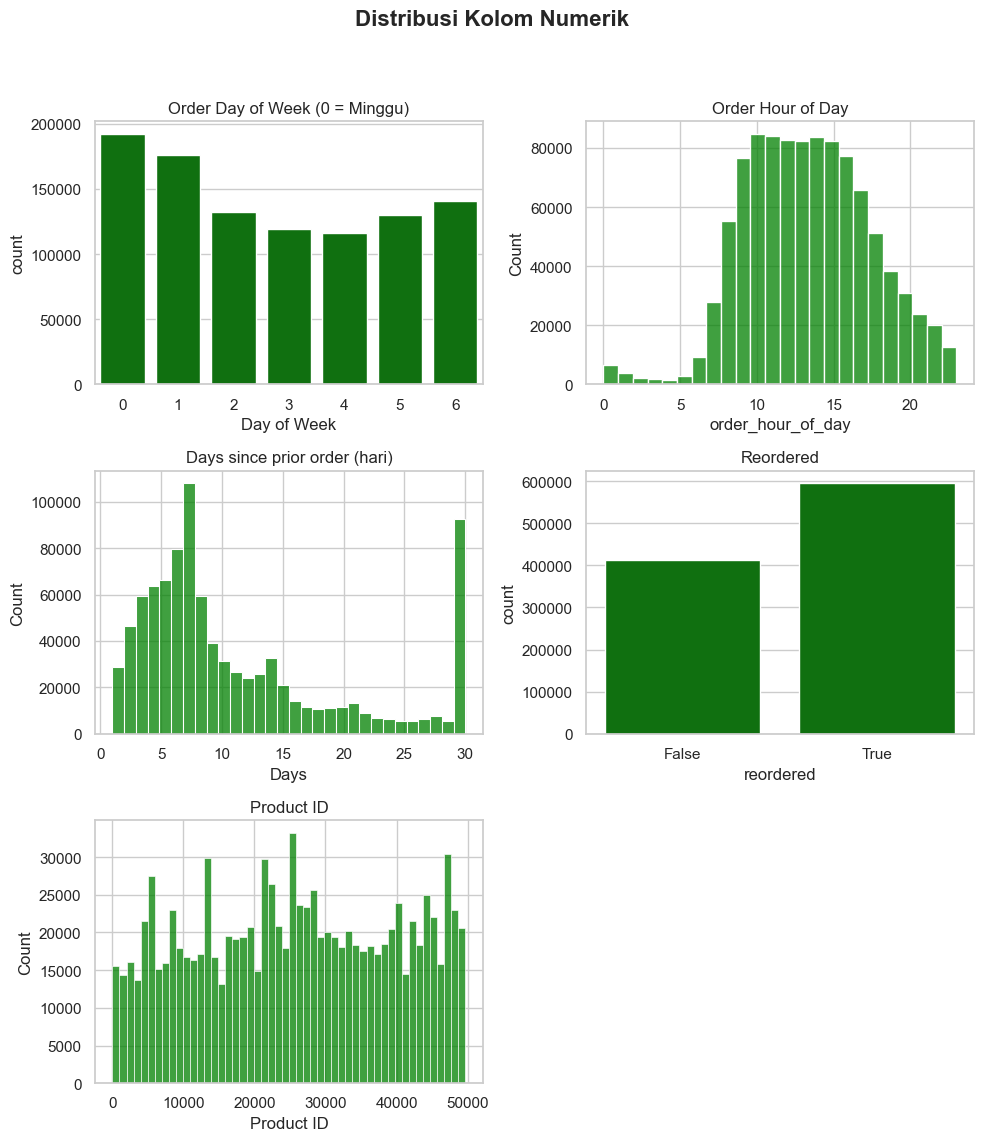

In [18]:
# Set tema
sns.set_theme(style="whitegrid")

# Ukuran figsize 10x12 sudah pas, font suptitle diperbesar sedikit agar terbaca
fig, axes = plt.subplots(3, 2, figsize=(10, 12)) 
fig.suptitle('Distribusi Kolom Numerik', fontsize=16, fontweight='bold')

# 1. Order Day of Week
sns.countplot(ax=axes[0, 0], x='order_dow', data=df_sample, color='green')
axes[0, 0].set_title('Order Day of Week (0 = Minggu)', fontsize=12)
axes[0, 0].set_xlabel('Day of Week')

# 2. Order Hour of Day
sns.histplot(ax=axes[0, 1], x='order_hour_of_day', data=df_sample, bins=24, kde=False, color='green')
axes[0, 1].set_title('Order Hour of Day', fontsize=12)

# 3. Days Since Prior Order
sns.histplot(ax=axes[1, 0], x=df_sample.loc[df_sample['days_since_prior_order'] > 0, 'days_since_prior_order'], bins=30, kde=False, color='green')
axes[1, 0].set_title('Days since prior order (hari)', fontsize=12)
axes[1, 0].set_xlabel('Days')

# 4. Reordered (Gunakan color='green', bukan palette)
sns.countplot(ax=axes[1, 1], x='reordered', data=df_sample, color='green')
axes[1, 1].set_title('Reordered', fontsize=12)

# 5. Product ID
sns.histplot(ax=axes[2, 0], x='product_id', data=df_sample, bins=50, color='green')
axes[2, 0].set_title('Product ID', fontsize=12)
axes[2, 0].set_xlabel('Product ID')

# Hapus subplot kosong
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

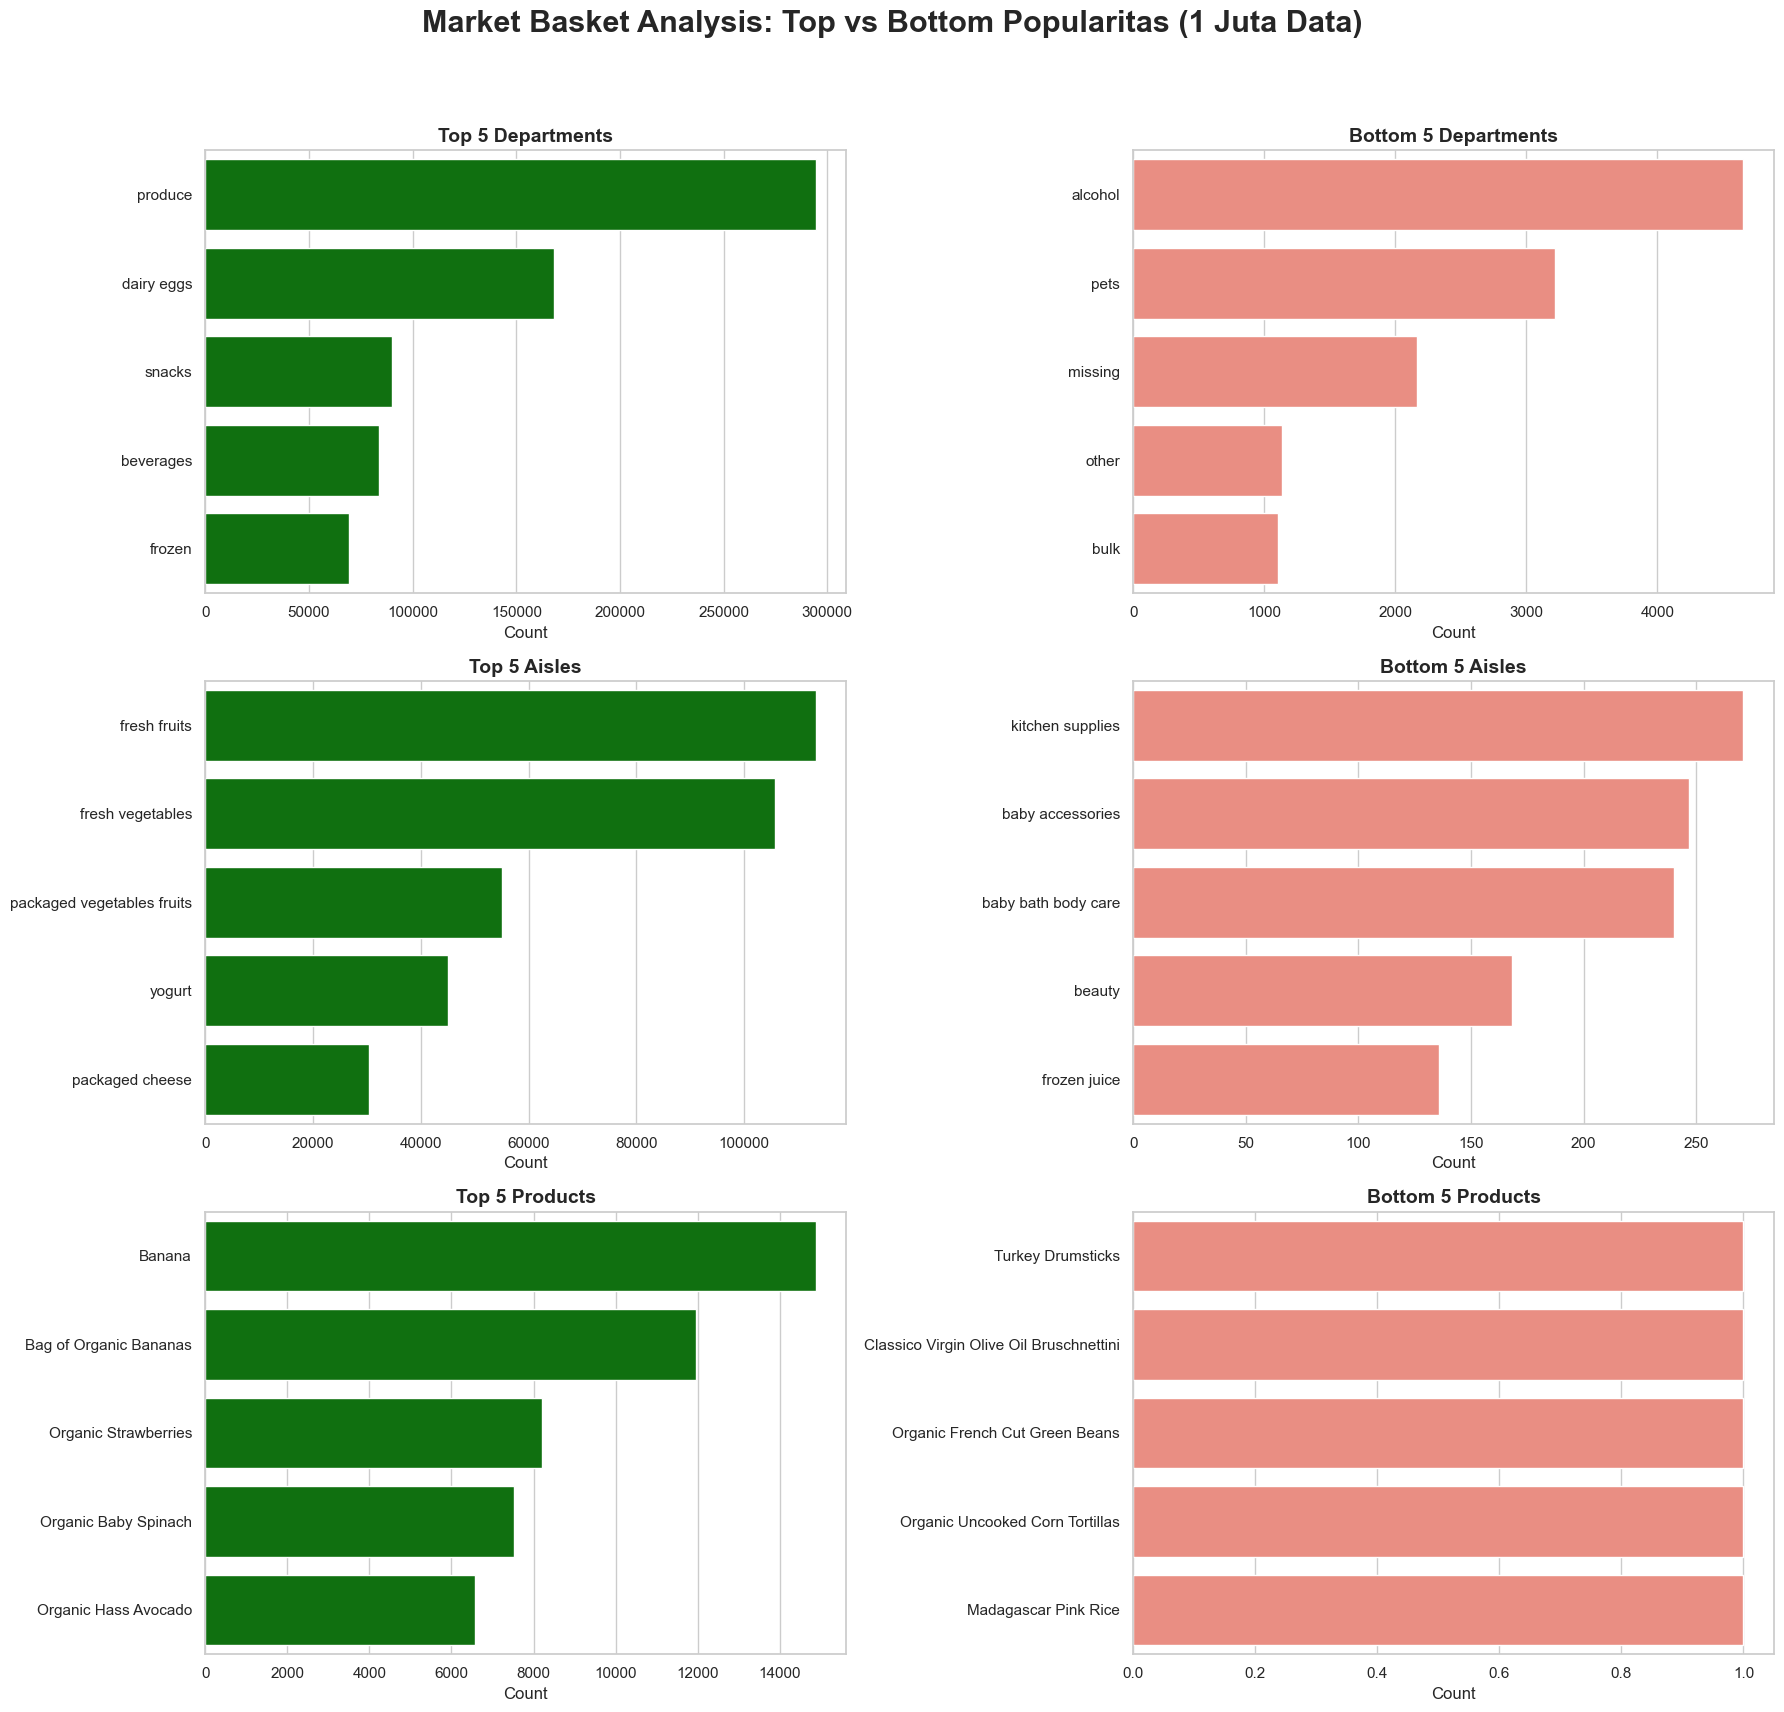

In [16]:
# 1. Siapkan data Top 5 dan Bottom 5 untuk tiap kategori
# Department
top_5_dept = df_sample['department'].value_counts().head(5)
bottom_5_dept = df_sample['department'].value_counts().tail(5)

# Aisle
top_5_aisles = df_sample['aisle'].value_counts().head(5)
bottom_5_aisles = df_sample['aisle'].value_counts().tail(5)

# Product
top_5_products = df_sample['product_name'].value_counts().head(5)
bottom_5_products = df_sample['product_name'].value_counts().tail(5)

# Set tema
sns.set_theme(style="whitegrid")

# Buat canvas 3 baris x 2 kolom
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Market Basket Analysis: Top vs Bottom Popularitas (1 Juta Data)', fontsize=22, fontweight='bold')

# --- BARIS 1: DEPARTMENT ---
sns.barplot(ax=axes[0, 0], x=top_5_dept.values, y=top_5_dept.index, color='green')
axes[0, 0].set_title('Top 5 Departments', fontsize=14, fontweight='bold')
sns.barplot(ax=axes[0, 1], x=bottom_5_dept.values, y=bottom_5_dept.index, color='salmon')
axes[0, 1].set_title('Bottom 5 Departments', fontsize=14, fontweight='bold')

# --- BARIS 2: AISLE ---
sns.barplot(ax=axes[1, 0], x=top_5_aisles.values, y=top_5_aisles.index, color='green')
axes[1, 0].set_title('Top 5 Aisles', fontsize=14, fontweight='bold')
sns.barplot(ax=axes[1, 1], x=bottom_5_aisles.values, y=bottom_5_aisles.index, color='salmon')
axes[1, 1].set_title('Bottom 5 Aisles', fontsize=14, fontweight='bold')

# --- BARIS 3: PRODUCT ---
sns.barplot(ax=axes[2, 0], x=top_5_products.values, y=top_5_products.index, color='green')
axes[2, 0].set_title('Top 5 Products', fontsize=14, fontweight='bold')
sns.barplot(ax=axes[2, 1], x=bottom_5_products.values, y=bottom_5_products.index, color='salmon')
axes[2, 1].set_title('Bottom 5 Products', fontsize=14, fontweight='bold')

# Rapikan label sumbu X (Count)
for ax in axes.flat:
    ax.set_xlabel('Count')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Untuk distribusi ditemukan adanya values missing tapi tidak jadi masalah karna sudah di labelkan

#### Export

In [20]:
# df_sample.to_csv(r'D:\Dhika Ramadhan Saputra\Data Analist\Full Project\Market Basket Analysis (MBA) & Bundling Strategy\data\clean\clean_dataset.csv', index=False)